In [1]:
import numpy as np
from HuffmanMatching.utils import GaussHermiteModulation, RandomWalkModulation, DiscretisedGaussianModulation
from shaping_analysis import generate_shaping_results, plot_distributions, plot_kl_vs_constellation_size

In [2]:
# parameters
variance = 1
start = 4
stop = 32
step = 2

#### Gauss Hermite Distribution

In [3]:
gausshermite_results = generate_shaping_results(start, stop, step, variance, GaussHermiteModulation)

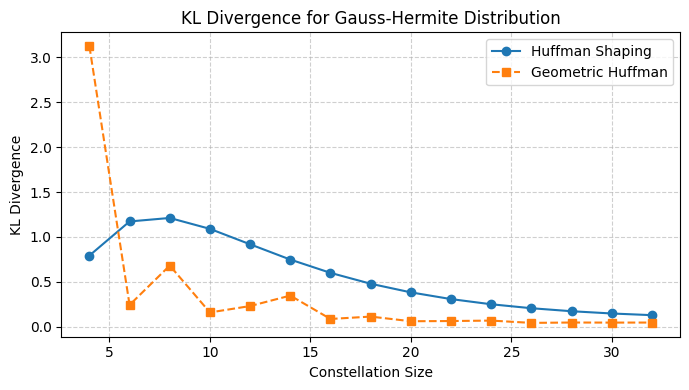

In [4]:
plot_kl_vs_constellation_size(gausshermite_results, "Gauss-Hermite Distribution")

In [5]:
#plot_distributions(gausshermite_results, "PAM (Gauss-Hermite)")

#### Binomial Distribution

In [6]:
binomial_results = generate_shaping_results(start, stop, step, variance, RandomWalkModulation)

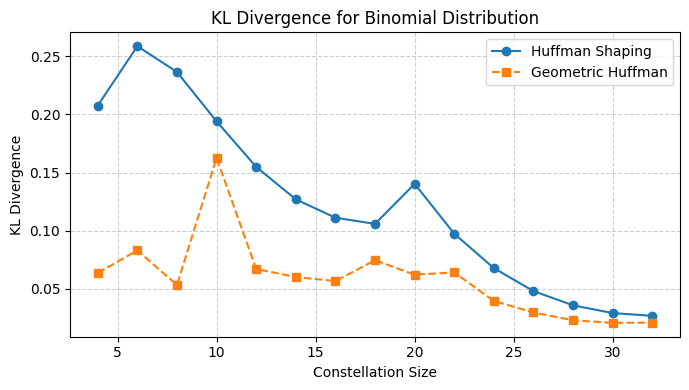

In [7]:
plot_kl_vs_constellation_size(binomial_results, "Binomial Distribution")

In [8]:
#plot_distributions(binomial_results, "PAM (Binomial)")

#### Gaussian Distribution

In [9]:
gaussian_results = generate_shaping_results(start, stop, step, variance, DiscretisedGaussianModulation)

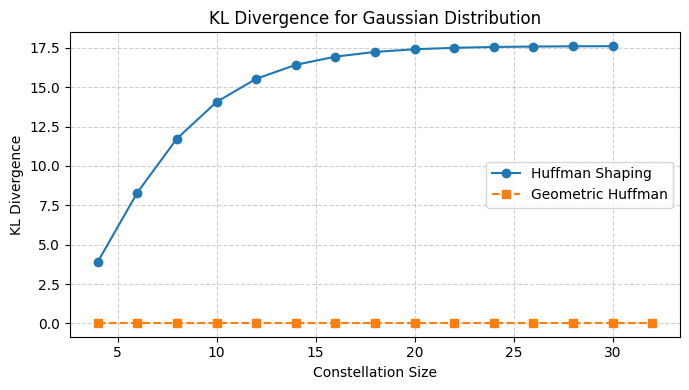

In [10]:
plot_kl_vs_constellation_size(gaussian_results, "Gaussian Distribution")

In [11]:
#plot_distributions(gaussian_results, "PAM (Gaussian)")